In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Load MNIST DATA SET csv file

In [13]:
mnist_train=pd.read_csv('mnist_train.csv',header=None)
mnist_test=pd.read_csv('mnist_test.csv',header=None)

In [14]:
x_train=mnist_train.iloc[:,1:].values
y_train=mnist_train.iloc[:,0].values

In [15]:
x_test=mnist_test.iloc[:,1:].values
y_test=mnist_test.iloc[:,0].values

In [16]:
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [17]:
x_train=tf.reshape(x_train,[-1,28,28])
x_test=tf.reshape(x_test,[-1,28,28])

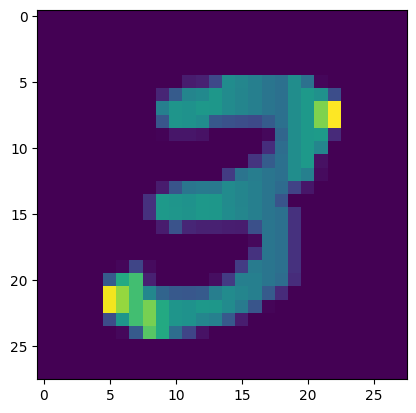

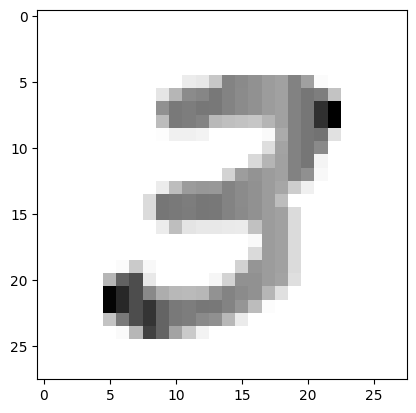

In [37]:
index=7
plt.imshow(x_train[index])
plt.show()
plt.imshow(x_train[index],cmap=plt.cm.binary)

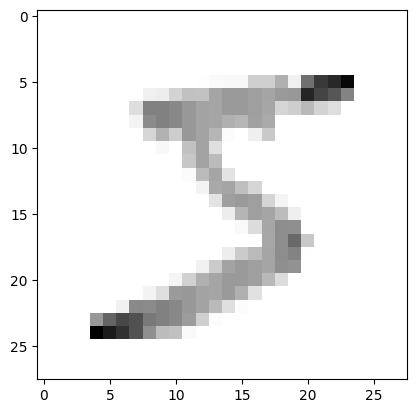

In [19]:
x_train=tf.keras.utils.normalize(x_train,axis=1) #normalissation
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [20]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #INCREASING ONE DIM FOR KERNEL OP
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape,x_testr.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Creating a Deep Neural Network
## Training an 60,000 samples of MNIST handwritten digits

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#third convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))


C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [28]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7760 - loss: 0.6797 - val_accuracy: 0.9637 - val_loss: 0.1202
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9649 - loss: 0.1102 - val_accuracy: 0.9771 - val_loss: 0.0768
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9788 - loss: 0.0719 - val_accuracy: 0.9795 - val_loss: 0.0680
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9825 - loss: 0.0530 - val_accuracy: 0.9732 - val_loss: 0.0848
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9785 - val_loss: 0.0720


In [29]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0829
Test loss on 10,000 test samples 0.06845271587371826
Validation accuracy on 10,000 test samples 0.9807000160217285


In [30]:
predictions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
print(predictions)

[[4.89729257e-10 3.84803570e-07 2.53469784e-06 ... 9.99995947e-01
  9.18624399e-10 1.42380658e-08]
 [1.93213473e-05 1.09379442e-07 9.99940395e-01 ... 4.01694393e-08
  3.87872575e-07 3.36368738e-10]
 [1.29469856e-06 9.99636769e-01 1.02546710e-06 ... 3.55701544e-04
  1.34563913e-06 9.41570931e-07]
 ...
 [4.92359797e-09 2.14811209e-08 9.09389097e-09 ... 1.03505745e-05
  2.80483732e-06 2.47339940e-05]
 [2.06669192e-05 1.04326059e-08 1.06392090e-05 ... 3.20324958e-08
  1.75960551e-04 1.28409610e-07]
 [9.81189194e-04 5.84735957e-08 1.33113601e-04 ... 1.27504620e-07
  5.95792262e-05 2.67902033e-05]]


In [36]:
print(np.argmax(predictions[6]))

4


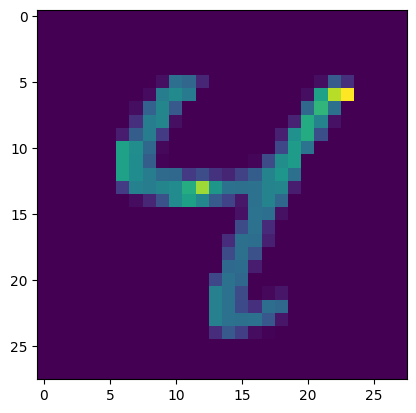

In [62]:
plt.imshow(x_test[6])

In [63]:
import cv2

In [64]:
img=cv2.imread('2.png')

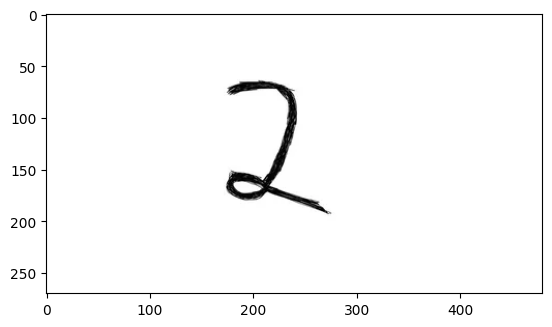

In [65]:
plt.imshow(img)

In [72]:
img.shape

(270, 480, 3)

In [66]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [73]:
gray.shape

(270, 480)

In [74]:
resized=cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)

In [75]:
resized.shape

(28, 28)

In [76]:
newimage=tf.keras.utils.normalize(resized,axis=1)

In [77]:
newimage=np.array(newimage).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [78]:
newimage.shape

(1, 28, 28, 1)

In [81]:
predictions=model.predict(newimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [83]:
print((predictions))

[[0.6820555  0.00880663 0.10517046 0.02857403 0.06602295 0.00914005
  0.0470504  0.00837893 0.02295411 0.02184695]]
